In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("Sunspots.csv")

In [3]:
df.shape

(3265, 3)

In [4]:
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [5]:
df['Date'][0]

'1749-01-31'

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date'][0]

Timestamp('1749-01-31 00:00:00')

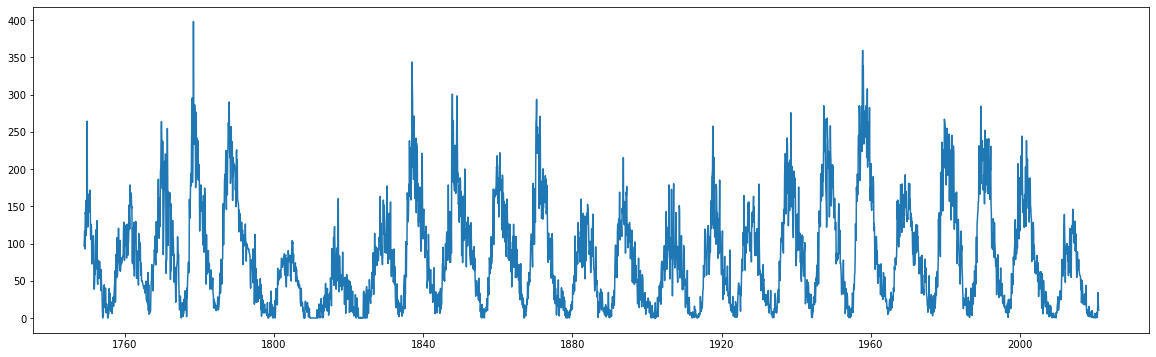

In [8]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Monthly Mean Total Sunspot Number'])
plt.show()

In [9]:
time_step = 10
n = len(df)

In [10]:
model = Sequential()
model.add(SimpleRNN(5, input_shape=(time_step,1), activation='tanh'))
model.add(Dense(10, activation="tanh"))
model.add(Dense(5, activation="tanh"))
model.add(Dense(1, activation="linear"))

In [11]:
model.compile(optimizer='sgd', loss="mean_squared_error")

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


In [13]:
# x_train = []
# y_train = []
# for i in range(0,len(x)-3):
#     x_train.append(x[i:i+3])
#     y_train.append(x[i+3])

In [14]:
data = df['Monthly Mean Total Sunspot Number'].values

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
minmax = MinMaxScaler()
data = minmax.fit_transform(data.reshape(-1,1))

In [17]:
target_indexes = np.arange(time_step, n, time_step)
n_rows = len(target_indexes)

In [18]:
n_rows

326

In [19]:
X = data[range(time_step * n_rows)]
X = np.reshape(X, (n_rows, time_step, 1))

In [20]:
print(X[0])

[[0.24284279]
 [0.26192868]
 [0.29306881]
 [0.23304872]
 [0.35585133]
 [0.34957308]
 [0.39678553]
 [0.27749874]
 [0.31767956]
 [0.31592165]]


In [21]:
y = data[target_indexes]

In [22]:
y[0]

array([0.66373682])

In [23]:
split_ratio = 0.8
split = int(n_rows * split_ratio)

In [24]:
split

260

In [25]:
x_train = X[:split]
y_train = y[:split]
x_test = X[split:]
y_test = y[split:]

In [26]:
x_train.shape

(260, 10, 1)

In [27]:
x_test.shape

(66, 10, 1)

In [28]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
9/9 [==============================] - 1s 23ms/step - loss: 0.0385 - val_loss: 0.0320
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0319 - val_loss: 0.0274
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.0247
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0262 - val_loss: 0.0223
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0244 - val_loss: 0.0212
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0231 - val_loss: 0.0205
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0222 - val_loss: 0.0188
Epoch 8/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0213 - val_loss: 0.0180
Epoch 9/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0200 - val_loss: 0.0172
Epoch 10/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.0166


3/3 [==============================] - 0s 2ms/step


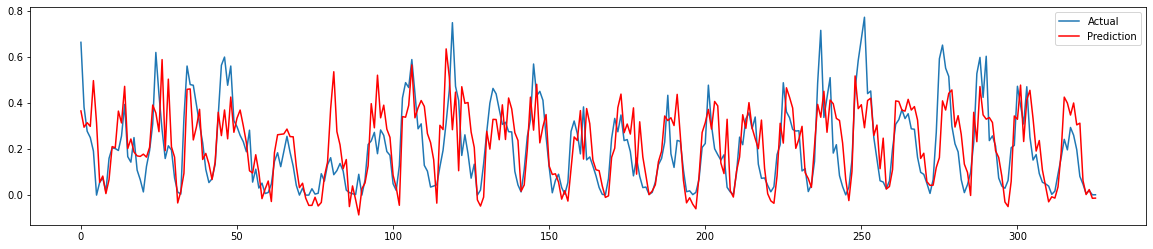

In [29]:
plt.figure(figsize=(20,4))
actual_data = np.append(y_train, y_test)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
pred = np.append(y_pred_train, y_pred_test)
plt.plot(range(n_rows), actual_data, label="Actual")
plt.plot(range(n_rows), pred, color='red', label="Prediction")
plt.legend()
plt.show()

In [30]:
X[0]

array([[0.24284279],
       [0.26192868],
       [0.29306881],
       [0.23304872],
       [0.35585133],
       [0.34957308],
       [0.39678553],
       [0.27749874],
       [0.31767956],
       [0.31592165]])

In [31]:
# def sliceData(time_step = 10, n = len(df)):
#     target_indexes = np.arange(time_step, n, time_step)
#     n_rows = len(target_indexes)

#     X = data[range(time_step * n_rows)]
#     X = np.reshape(X, (n_rows, time_step, 1))

#     y = data[target_indexes]

#     split_ratio = 0.8
#     split = int(n_rows * split_ratio)

#     x_train = X[:split]
#     y_train = y[:split]
#     x_test = X[split:]
#     y_test = y[split:]
    
#     return x_train, y_train, x_test, y_test

In [32]:
n = len(df)
train_df = df['Monthly Mean Total Sunspot Number'][0:int(n * split_ratio)].values
test_df = df['Monthly Mean Total Sunspot Number'][int(n * split_ratio):].values

# For single column
minmax = MinMaxScaler()
train_df = minmax.fit_transform(train_df.reshape(-1,1))
test_df = minmax.transform(test_df.reshape(-1,1))

In [33]:
train_x = train_df
test_x = test_df

In [36]:
train_x.shape

(2612, 1)

In [37]:
train_x[0:6]

array([[0.24284279],
       [0.26192868],
       [0.29306881],
       [0.23304872],
       [0.35585133],
       [0.34957308]])

In [133]:
class Window():
    def __init__(self, input_step, label_width, lag, x_train=train_x, x_test=test_x):
        
        self.train_df = x_train
        self.test_df = x_test
        
        self.input_step = input_step
        self.label_width = label_width
        self.lag = lag
        
        self.total_window_size = input_step + lag
        
        self.input_slices = slice(0, input_step)
        self.input_indices =  np.arange(self.total_window_size)[self.input_slices]
        
        self.labels_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.labels_start, None)
        self.labels_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def show(self):
        print(f"Window Size : {self.total_window_size}")
        print(f"Input Indices : {self.input_indices}")
        print(f"Label Indices : {self.labels_indices}")
        
    def splitWindow(self, features):
        inputs = features[:, self.input_slices, :]
        labels = features[:, self.labels_slice, :]
        
        inputs.set_shape([None, self.input_step, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels

        
    def make_data(self, data):
        ds = tf.keras.utils.timeseries_dataset_from_array(data,
                                                          targets=None,
                                                          sequence_length=self.total_window_size,
                                                         batch_size=32)
        ds = ds.map(self.splitWindow)
        return ds
    
    @property
    def train(self):
        return self.make_data(self.train_df)
    
    @property
    def test(self):
        return self.make_data(self.test_df)

In [372]:
w = Window(input_step=6, label_width=1, lag=3)

In [373]:
w.show()

Window Size : 9
Input Indices : [0 1 2 3 4 5]
Label Indices : [8]


In [136]:
w = Window(input_step=10, label_width=10, lag=10)

In [137]:
w.show()

Window Size : 20
Input Indices : [0 1 2 3 4 5 6 7 8 9]
Label Indices : [10 11 12 13 14 15 16 17 18 19]


In [198]:
output_steps = 100
num_features = x_train.shape[1]

In [199]:
w = Window(input_step=10, label_width=output_steps, lag=output_steps)

In [200]:
w.show()

Window Size : 110
Input Indices : [0 1 2 3 4 5 6 7 8 9]
Label Indices : [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109]


In [201]:
w = Window(input_step=10, label_width=output_steps, lag=output_steps)

In [287]:
def compileModel(model, window, patience=4):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')
    model.compile(optimizer='adam',
                            loss="mean_squared_error",
                            metrics=[tf.keras.metrics.MeanAbsoluteError()])
    history = model.fit(window.train, epochs=50, validation_data=window.test,
                                 callbacks=[early_stopping])
    return history

In [349]:
singleShotModel = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=False),
    #SimpleRNN(5, input_shape=(time_step,output_steps), activation='tanh'),
#     Dense(16, activation="tanh"),
#     tf.keras.layers.Dropout(0.3),
#     Dense(16, activation="tanh"),
#     tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(output_steps * num_features, activation="linear"),
    tf.keras.layers.Reshape([output_steps, num_features])
])

In [350]:
history = compileModel(singleShotModel, w)

Epoch 1/50
79/79 [==============================] - 2s 9ms/step - loss: 0.0433 - mean_absolute_error: 0.1578 - val_loss: 0.0341 - val_mean_absolute_error: 0.1539
Epoch 2/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0318 - mean_absolute_error: 0.1425 - val_loss: 0.0328 - val_mean_absolute_error: 0.1525
Epoch 3/50
79/79 [==============================] - 0s 4ms/step - loss: 0.0312 - mean_absolute_error: 0.1416 - val_loss: 0.0321 - val_mean_absolute_error: 0.1504
Epoch 4/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0308 - mean_absolute_error: 0.1408 - val_loss: 0.0316 - val_mean_absolute_error: 0.1486
Epoch 5/50
79/79 [==============================] - 0s 4ms/step - loss: 0.0303 - mean_absolute_error: 0.1395 - val_loss: 0.0308 - val_mean_absolute_error: 0.1458
Epoch 6/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0291 - mean_absolute_error: 0.1362 - val_loss: 0.0283 - val_mean_absolute_error: 0.1376
Epoch 7/50
79/79 [==========

In [351]:
y_pred_train = singleShotModel.predict(train_x)
y_pred_test = singleShotModel.predict(test_x)
pred = np.append(y_pred_train, y_pred_test)

21/21 [==============================] - 0s 800us/step


In [352]:
y_pred_train = singleShotModel.predict(train_x)

82/82 [==============================] - 0s 728us/step


In [353]:
y_pred_train.shape

(2612, 100, 10)

In [354]:
y_pred_train[:, 0, 0].shape

(2612,)

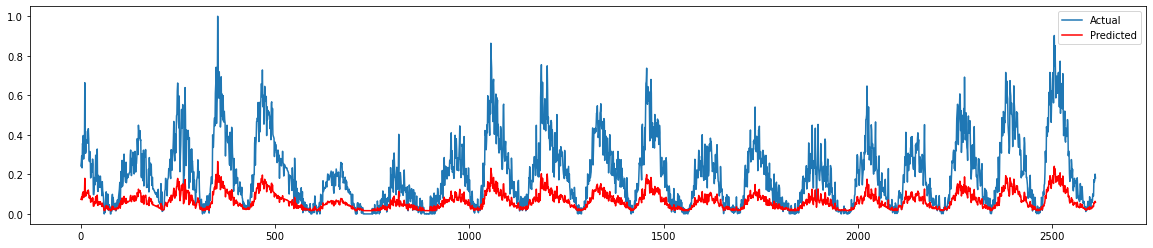

In [355]:
plt.figure(figsize=(20,4))
actual_data = train_x
plt.plot(actual_data, label="Actual")
pred_data = y_pred_train[:, 0, 0]
plt.plot(pred_data, label="Predicted", color='red')
plt.legend()
plt.show()

In [356]:
test_x[-1]

array([0.02611753])

In [357]:
train_df[-1]

array([0.18232044])

In [358]:
last_data = df['Monthly Mean Total Sunspot Number'].values[-1]

In [359]:
last_x = minmax.transform([[last_data]])

In [360]:
last_x

array([[0.02611753]])

In [361]:
future_pred = singleShotModel.predict(last_x)

1/1 [==============================] - 0s 13ms/step


In [362]:
future_pred.shape

(1, 100, 10)

In [363]:
future_pred = future_pred[0][:,0]

In [364]:
future_pred = minmax.inverse_transform(future_pred.reshape(-1,1))

In [365]:
# print(future_pred)

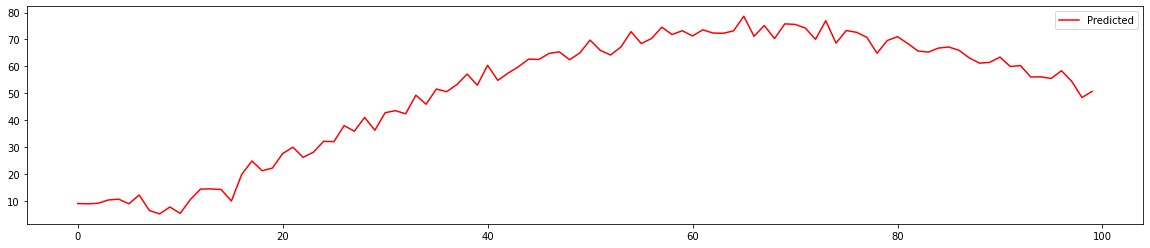

In [366]:
plt.figure(figsize=(20,4))
plt.plot(future_pred, label="Predicted", color='red')
plt.legend()
plt.show()

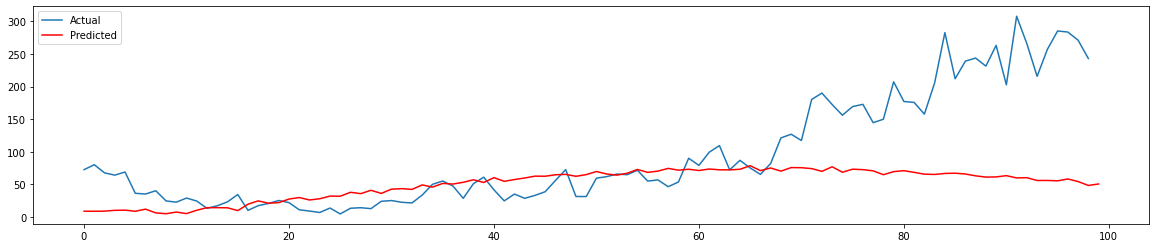

In [367]:
plt.figure(figsize=(20,4))
actual_data = train_x[-1:-100:-1]
actual_data = minmax.inverse_transform(actual_data)
plt.plot(actual_data, label="Actual")
pred_data = y_pred_train[:, 0, 0]
plt.plot(future_pred, label="Predicted", color='red')
plt.legend()
plt.show()